In [8]:
from res_specialization import *
from matplotlib import pyplot as plt
import sys
import random
import pickle
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) 
plt.rcParams['figure.figsize'] = [10, 5]

In [38]:
TRIALS      = 1000
NUM_TO_SPEC = 3
TOL = 5

diff_eq_params = {"x0": [-20, 10, -.5], 
                  "begin": 0, 
                  "end": 60, 
                  "timesteps":60000}

res_params = {"res_sz": 100, 
              "activ_f": np.tanh,
              "connect_p": .01, 
              "ridge_alpha": .00001, 
              "spect_rad": .9, 
              "gamma": 1., 
              "sigma": .12,
              "uniform_weights": True,
              #"solver": "least squares"
             }

results = dict()


def save_results():
    pickle.dump(results, open("spec_tw.pkl","wb"))
# end

### Model trajectory

In [29]:
t, train_t, u = lorenz_equ(**diff_eq_params )
train_t = t[30000:50000]
test_t  = t[50000:]

In [41]:
rc = ResComp(3,3,**res_params)
r_0 = rc.state_0
err = rc.fit(train_t, u)

test_pre = rc.predict(test_t)
train_pre = rc.predict(train_t, r_0=r_0)
err

0.04930818365740892

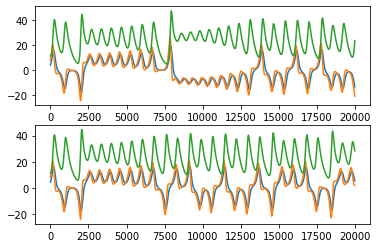

12.007530139272538


In [5]:
plt.subplot(211)
plt.plot(train_pre.T)
plt.subplot(212)
plt.plot(u(train_t).T)
plt.show()
print(L2error(u(train_t),train_pre))

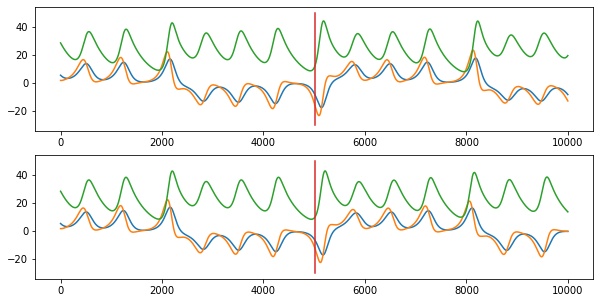

5020


In [268]:
pre_dist = how_long_accurate(test_pre,u(test_t),tol=5)
x,y = pre_dist*np.ones(100),np.linspace(-30,50,100)

plt.subplot(211)
plt.plot(test_pre.T)
plt.plot(x,y)
plt.subplot(212)
plt.plot(u(test_t).T)
plt.plot(x,y)
plt.show()
print(pre_dist)

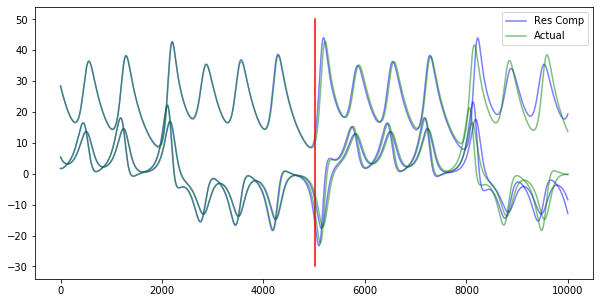

5020


In [299]:
pre_dist = how_long_accurate(test_pre,u(test_t),tol=5)
x,y = pre_dist*np.ones(100),np.linspace(-30,50,100)

res_lines = plt.plot(test_pre.T,c='b',alpha=.5,label="Res Comp")
plt.plot(x,y,c='r')
act_lines = plt.plot(u(test_t).T,c='g',alpha=.5, label="Actual")
plt.legend([res_lines[0],act_lines[0]],['Res Comp','Actual'])
plt.show()
print(pre_dist)

In [6]:
def fit_lorenz(data, res_params):
    train_t, test_t, u = data 
    rc = ResComp(3,3, **res_params)

    r_0 = rc.state_0
    rc.fit(train_t,u)
    test_pre = rc.predict(test_t)
    train_pre = rc.predict(train_t, r_0=r_0)
    
    err = L2error(u(train_t), train_pre)
    # Plot fit to training curve
    plt.subplot(211)
    res_lines = plt.plot(train_pre.T,c='b',alpha=.5,label="Res Comp")
    act_lines = plt.plot(u(train_t).T,c='g',alpha=.5, label="Actual")
    plt.legend([res_lines[0],act_lines[0]],['Res Comp','Actual'])
    plt.title("Model Fit to Train Data")
    plt.xticks([])
    
    # Plot test predicitons
    plt.subplot(212)
    res_lines = plt.plot(test_pre.T,c='b',alpha=.5,label="Res Comp")
    act_lines = plt.plot(u(test_t).T,c='g',alpha=.5, label="Actual")
    
    # Plot prediction cutoff
    pre_dist = how_long_accurate(test_pre,u(test_t),tol=5)
    x,y = pre_dist*np.ones(100),np.linspace(-30,50,100)
    cutoff = plt.plot(x,y,c='r')
    plt.title("Model Fit to Test Data")
    plt.legend([res_lines[0],act_lines[0]],['Res Comp','Actual'])

    plt.show()
    
    print("Average L2 Error: {}".format(err) )
    print("Accurate prediction for {} timesteps".format(pre_dist))

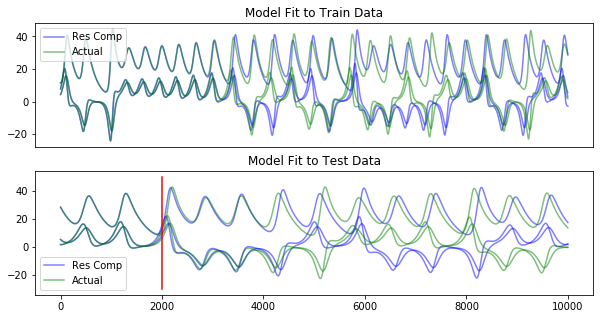

Average L2 Error: 8.548300996027923
Accurate prediction for 1995 timesteps


In [14]:
res_params = {"res_sz": 1000, 
              "activ_f": np.tanh, 
              "connect_p": 0.00001, 
              "ridge_alpha": 1e-10, 
              "spect_rad": .9, 
              "gamma": 1., 
              "sigma": 0.12, 
              "uniform_weights": True,
              "solver": "ridge"
             }

    
fit_lorenz([train_t,test_t,u],res_params)

In [43]:
import pickle
import pandas as pd

results = pickle.load(open("spec_tw.pkl", 'rb'))
df = pd.DataFrame(results)
df.describe()

,random_err,random_pred,specialized_err,specialized_pred,spec_sizes,spec_edges,match_edge_err,match_edge_pred,random_specialized_err,random_specialized_pred,rspec_sizes,rspec_edges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.115694,175.961000,0.092050,2463.711000,120.563000,245.239000,0.207282,1395.971000,0.195067,2026.941000,78.389000,178.356000
std,0.941834,279.512283,0.086632,878.324753,75.718712,131.357568,0.283884,942.076741,0.171866,970.983386,38.338173,65.661653
min,0.699625,0.000000,0.015542,88.000000,40.000000,92.000000,0.008042,0.000000,0.020814,31.000000,29.000000,80.000000
25%,1.564353,33.000000,0.039677,2049.500000,75.000000,170.000000,0.047707,641.000000,0.074903,1339.750000,54.750000,136.750000
50%,1.923689,96.000000,0.062138,2165.500000,98.000000,208.000000,0.112512,1334.500000,0.138612,2057.500000,68.000000,162.500000
75%,2.424466,186.000000,0.109463,2882.250000,137.000000,272.250000,0.245397,2041.250000,0.259987,2793.000000,89.000000,199.000000
max,8.976677,2797.000000,0.757163,5000.000000,678.000000,1521.000000,3.024311,5000.000000,1.096698,5000.000000,321.000000,623.000000


# Does Specializing More than Once Improve Learning

In [1]:
from res_specialization import *
from matplotlib import pyplot as plt
import sys
import random
import pickle
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
TRIALS      = 1000
NUM_TO_SPEC = 3
TOL = 5

diff_eq_params = {"x0": [-20, 10, -.5], 
                  "begin": 0, 
                  "end": 60, 
                  "timesteps":60000}

res_params = {"res_sz": 30, 
              "activ_f": np.tanh,
              "connect_p": .12, 
              "ridge_alpha": .00001, 
              "spect_rad": .9, 
              "gamma": 1., 
              "sigma": 0.12,
              "uniform_weights": True
             }

results = dict()


def save_results():
    pickle.dump(results, open("spec_tw.pkl","wb"))
# end

### Model trajectory

In [3]:
t, train_t, u = lorenz_equ(**diff_eq_params )
train_t = t[30000:55000]
test_t  = t[55000:]

In [42]:
np.mean(np.linalg.norm(train_pre-u(train_t),ord=2,axis=0))

12.007530139272538

In [43]:
L2error(train_pre,u(train_t))

12.007530139272538